# 作業目標:
使用CIFAR100, 數據集變大的影響

In [127]:

import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

資料準備

In [128]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [129]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [130]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [131]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [132]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [133]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [134]:
#針對物件圖像數據集的類別編列成字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

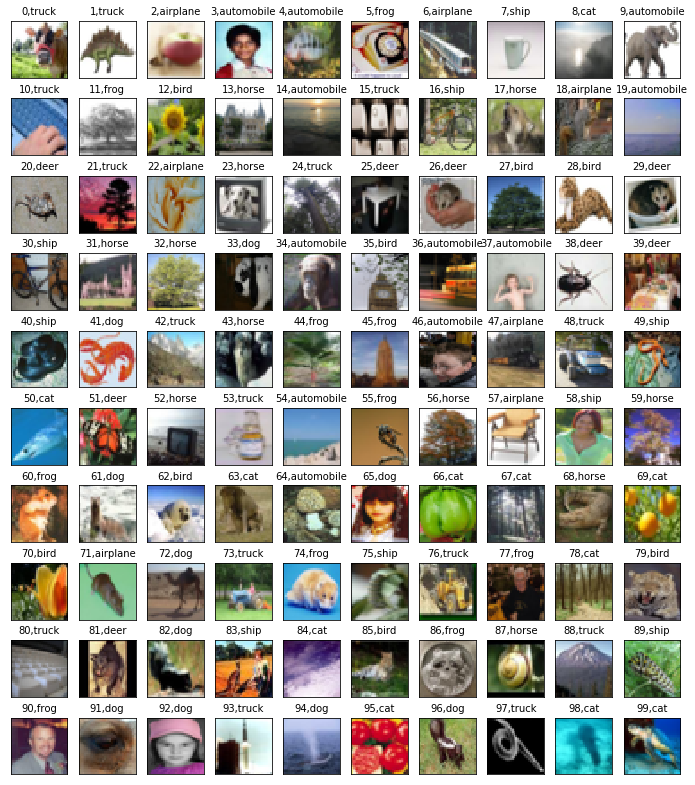

In [147]:
#導入影像列印模組
import matplotlib.pyplot as plt
#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,idx,num=100):
    
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>100: num=100 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
             
        title=str(i)+','+label_dict[labels[i][0]%10]
        if len(prediction)>0:
           title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
    #針對不同的影像作標記
plot_images_labels_prediction(x_img_train,y_label_train,[],0)   

In [136]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


影像正規化

In [137]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [138]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [139]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

轉換label 為OneHot Encoding

In [140]:
y_label_train.shape

(50000, 1)

In [141]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [142]:
y_label_train_OneHot.shape

(50000, 100)

In [143]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

   ANS:由於資料集圖像總數不同(10 V.S),需於列表設定完全後再觀察辨識效果.